In [62]:
import os

from collections import Counter
import numpy as np
import pandas as pd
import re

import seaborn as sns
import matplotlib.pyplot as plt

import nltk
nltk.download('stopwords')
nltk.download("punkt")
nltk.download('punkt_tab')

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\AIAS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\AIAS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\AIAS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [60]:
def read_report(path:str, filename:str) -> str:
    with open(os.path.join(path, filename), mode="r", encoding="utf-8") as file:
        return file.read()
    
def plot_word_frequency(data):
    fig, ax = plt.subplots(figsize=(8, 8))
    sns.barplot(data=data[:20],
            x="frequency",
            y="token").set(title=f"Top {data.shape[0]} tokens in corpus")
    
def create_word_counter(reports:list) -> dict:
    # Initiate a list to store words
    vocabulary = []
    # Tokenize the list of texts
    tokenized_reports = [word_tokenize(r) for r in reports]
    # Update vocabulary
    for i in tokenized_reports:
        vocabulary.extend(i)
    # Create a dictionary with word:frequency pairs
    word_counter = {key:value for key, value in sorted(Counter(vocabulary).items(), key=lambda items: items[1], reverse=True)}
    return word_counter

def preprocess(text:str, stopwords:list) -> str:
    # Remove punctuation
    text = re.sub(r"[^a-z]", " ", text)
    # Remove any spaces left in the begining or at the end
    text = text.strip()
    # Tokenize text
    tokens = word_tokenize(text)
    # Clean tokens from less than 2 char length tokens and stop words
    tokens = list(filter(lambda x: len(x)>2 and x not in stopwords, tokens))
    return " ".join(tokens)

def image_text_word_count(report):
    # Count all words in report
    all_word_count = len(word_tokenize(report))
    # Match text between <image>...</image>
    matches = re.findall(r'(<image>.*?</image>)', report, re.DOTALL)
    # Count words in images
    image_word_count = 0
    for m in matches:
        image_word_count += len(word_tokenize(m))
    return {"words in report":all_word_count-image_word_count,
            "words in images":image_word_count}

def image_description_word_count(reports):
    image_word_count = []
    for r in reports:
        # Match text between <image>...</image>
        matches = re.findall(r'(<image>.*?</image>)', r, re.DOTALL)
        for m in matches:
            image_word_count.append(len(word_tokenize(m)))
    return np.array(image_word_count)

In [34]:
# Read data - reports
data_path = "data/reports"
reports = [read_report(data_path, filename) for filename in os.listdir(data_path)]

In [ ]:
# Store word:frequency pairs in a dictionary
word_counter = create_word_counter(reports)

In [36]:
# Create a pandas dataframe with the above dictionary
token_frequency_df = pd.DataFrame(
    {"token":word_counter.keys(), "frequency":word_counter.values()}
)

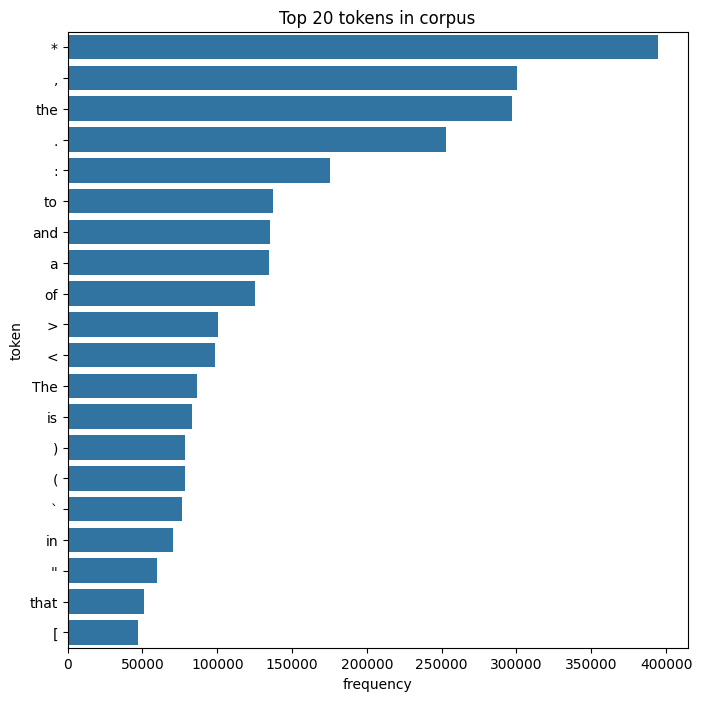

In [50]:
# Create a barplot of results
plot_word_frequency(token_frequency_df[:20])

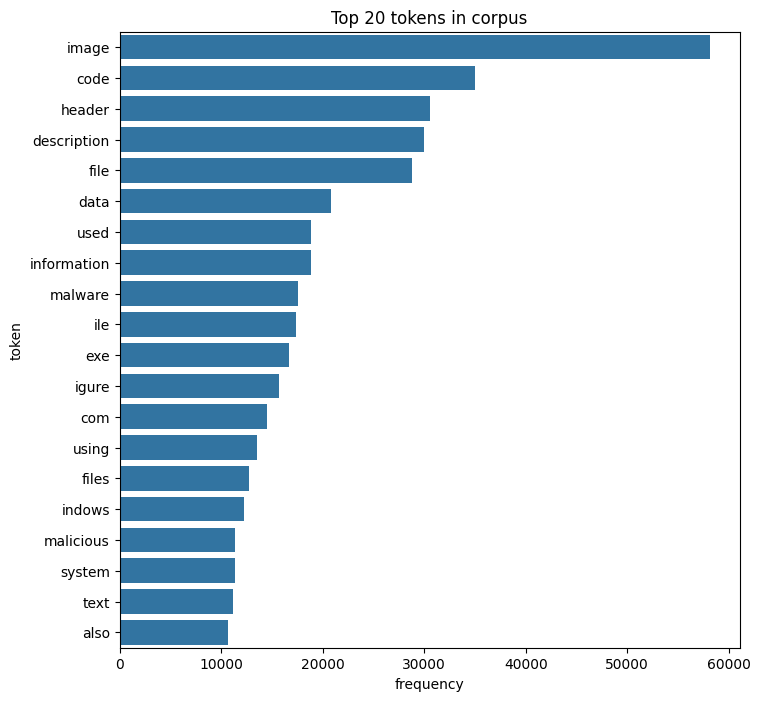

In [49]:
# Do the same as before by first processing the reports
processed_reports = [preprocess(r, stopwords.words("english")) for r in reports]
word_counter_p = create_word_counter(processed_reports)
token_frequency_df_p = pd.DataFrame(
    {"token":word_counter_p.keys(), "frequency":word_counter_p.values()}
)
plot_word_frequency(token_frequency_df_p[:20])

In [56]:
words_in_reports = []
words_in_images = []
for r in reports:
    res = image_text_word_count(r)
    words_in_reports.append(res["words in report"])
    words_in_images.append(res["words in images"])

In [57]:
words_ratio_df = pd.DataFrame(
    {"raw_text_report_word_count":words_in_reports,
     "image_descriptions_word_count":words_in_images}
)

Toral number of words in raw text: 3989008
Toral number of words in image descriptions: 4034361


<Axes: ylabel='Density'>

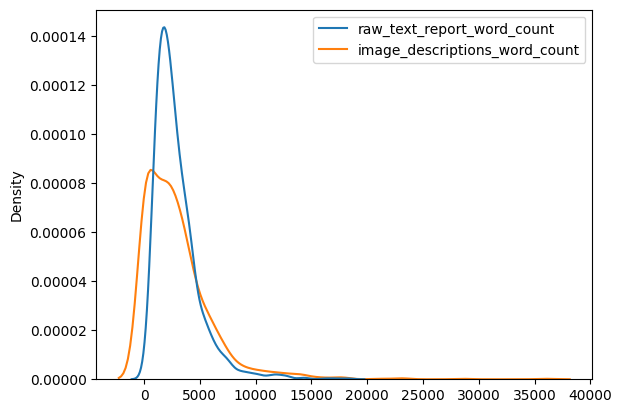

In [59]:
print(f"Toral number of words in raw text: {sum(words_in_reports)}")
print(f"Toral number of words in image descriptions: {sum(words_in_images)}")
sns.kdeplot(data=words_ratio_df)

In [63]:
img_descs_count = image_description_word_count(reports)

<Axes: ylabel='Count'>

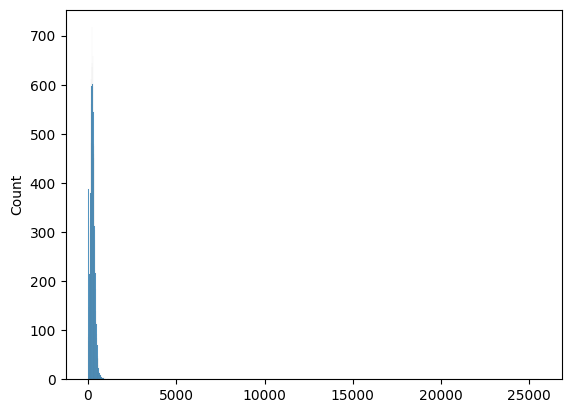

In [66]:
sns.histplot(img_descs_count)

In [65]:
img_descs_count.max()

np.int64(25553)

In [68]:
q_099 = np.quantile(img_descs_count, 0.99)
q_099

np.float64(659.5799999999999)

<Axes: ylabel='Count'>

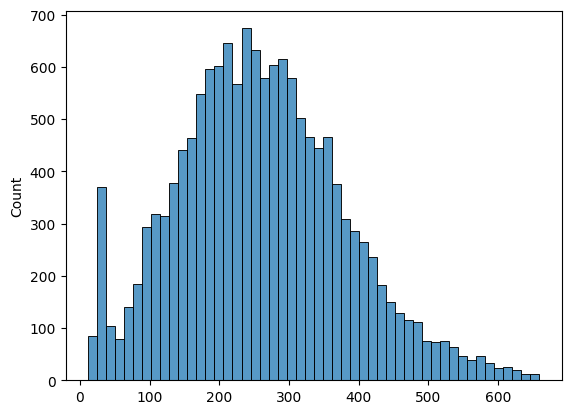

In [69]:
sns.histplot(img_descs_count[img_descs_count<=q_099])